In [9]:
import pandas as pd 
import sys
import os 
from dotenv import load_dotenv


sys.path.append('C:\\Users\\Ourba\\Desktop\\10Academy\\10ac_week1_telecom_analysis\\src')
from loader import load_data


load_dotenv()

user = os.getenv('PG_USER')
password = os.getenv('PG_PASSWORD')
database_name = 'telecom'
table_name= 'xdr_data'
host = 'localhost'
port = '5432'

#Load data from Loader Module
df = load_data(host, port, user, password, database_name, table_name)
print(df.head())






      Bearer Id            Start  Start ms              End  End ms  \
0  1.311448e+19   4/4/2019 12:01     770.0  4/25/2019 14:35   662.0   
1  1.311448e+19   4/9/2019 13:04     235.0   4/25/2019 8:15   606.0   
2  1.311448e+19   4/9/2019 17:42       1.0  4/25/2019 11:58   652.0   
3  1.311448e+19   4/10/2019 0:31     486.0   4/25/2019 7:36   171.0   
4  1.311448e+19  4/12/2019 20:10     565.0  4/25/2019 10:40   954.0   

   Dur. (ms)          IMSI  MSISDN/Number          IMEI  \
0  1823652.0  2.082014e+14   3.366496e+10  3.552121e+13   
1  1365104.0  2.082019e+14   3.368185e+10  3.579401e+13   
2  1361762.0  2.082003e+14   3.376063e+10  3.528151e+13   
3  1321509.0  2.082014e+14   3.375034e+10  3.535661e+13   
4  1089009.0  2.082014e+14   3.369980e+10  3.540701e+13   

      Last Location Name  ...  Youtube DL (Bytes)  Youtube UL (Bytes)  \
0  9.16456699548519E+015  ...          15854611.0           2501332.0   
1                L77566A  ...          20247395.0          19111729.0   

In [10]:
#import categorical data preproccessing module from utils.py
import importlib
import utils

importlib.reload(utils)
from utils import preproccess_categorical_data


from utils import preproccess_categorical_data
df[["Handset Manufacturer", "Handset Type"]]=preproccess_categorical_data(df[["Handset Manufacturer", "Handset Type"]])





In [11]:
#identifying the top 10 handsets used by the customers.
value_counts = df["Handset Type"].value_counts().reset_index()
# Selecting only the top ten values
value_counts.columns=['Handset Type','Handset count']
top_ten_values = value_counts.head(10)
top_ten_values = top_ten_values[top_ten_values['Handset Type'] != 'undefined']

print(top_ten_values)

                   Handset Type  Handset count
0              Huawei B528S-23A          20324
1       Apple iPhone 6S (A1688)           9419
2        Apple iPhone 6 (A1586)           9023
4        Apple iPhone 7 (A1778)           6326
5       Apple iPhone Se (A1723)           5187
6        Apple iPhone 8 (A1905)           4993
7       Apple iPhone Xr (A2105)           4568
8  Samsung Galaxy S8 (Sm-G950F)           4520
9        Apple iPhone X (A1901)           3813


C:\Users\Ourba\AppData\Local\Temp\ipykernel_20188\923290529.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Handset Type', y='Handset count', data=top_ten_values, palette='Blues')


([0, 1, 2, 3, 4, 5, 6, 7, 8],
 [Text(0, 0, 'Huawei B528S-23A'),
  Text(1, 0, 'Apple iPhone 6S (A1688)'),
  Text(2, 0, 'Apple iPhone 6 (A1586)'),
  Text(3, 0, 'Apple iPhone 7 (A1778)'),
  Text(4, 0, 'Apple iPhone Se (A1723)'),
  Text(5, 0, 'Apple iPhone 8 (A1905)'),
  Text(6, 0, 'Apple iPhone Xr (A2105)'),
  Text(7, 0, 'Samsung Galaxy S8 (Sm-G950F)'),
  Text(8, 0, 'Apple iPhone X (A1901)')])

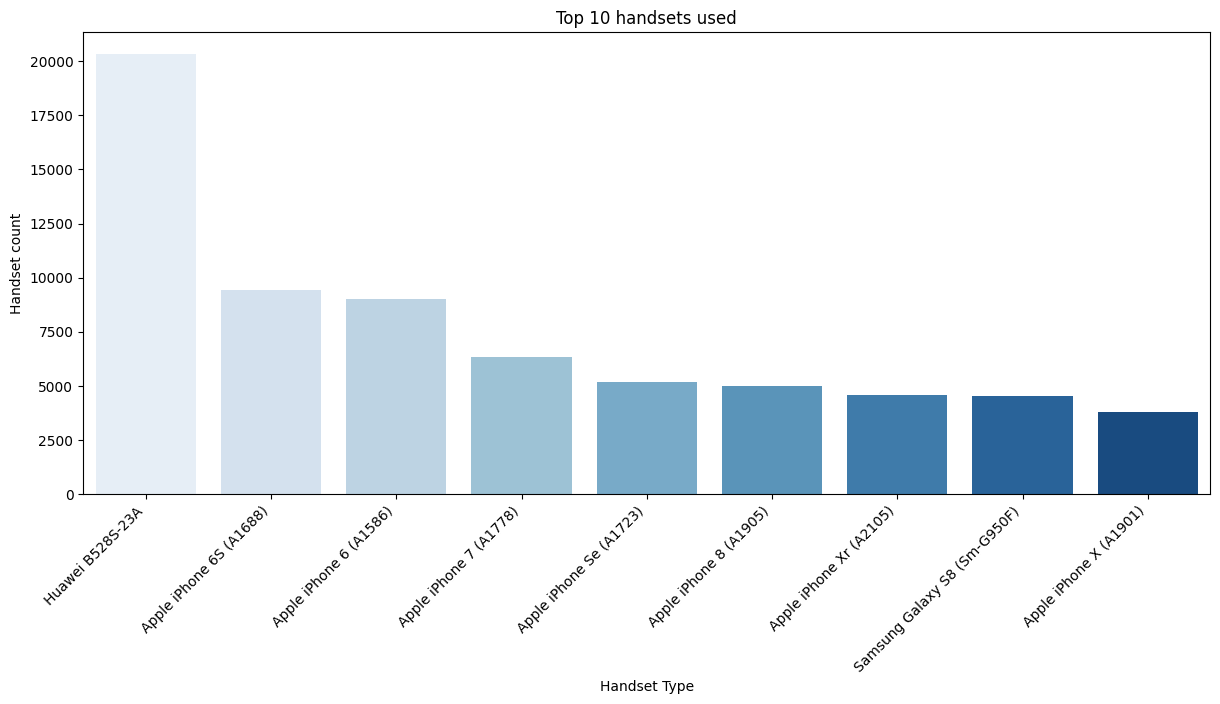

In [12]:
# Visualization
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(32, 6))

# Top 10
plt.subplot(1, 2, 1)
sns.barplot(x='Handset Type', y='Handset count', data=top_ten_values, palette='Blues')
plt.title('Top 10 handsets used')
plt.xticks(rotation=45, ha='right')

In [13]:
value_counts = df["Handset Manufacturer"].value_counts()
top_three_values = value_counts.head(3)
# Display the top 3 Handset Manufacturers
print(top_three_values)

Handset Manufacturer
Apple      60137
Samsung    40839
Huawei     34423
Name: count, dtype: int64


<BarContainer object of 3 artists>

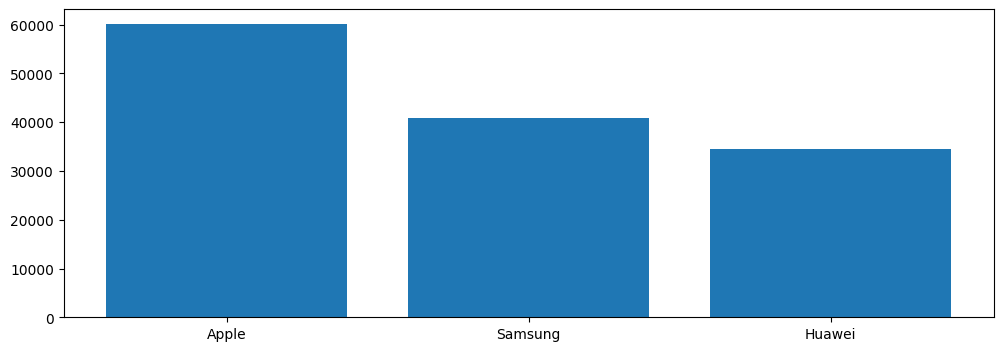

In [14]:
#visualazation
plt.figure(figsize=(12, 4))
plt.bar(top_three_values.index,top_three_values.values)

In [15]:
#Next, identify the top 5 handsets per top 3 handset manufacturer
manufacturer_column = 'Handset Manufacturer'
handset_column = 'Handset Type'

# Grouping by manufacturer and counting occurrences of each handset
grouped_data = df.groupby(manufacturer_column)[handset_column].value_counts()

# Identifying the top 3 handset manufacturers
top_manufacturers = df[manufacturer_column].value_counts().head(3).index

# Initializing a dictionary to store the top 5 handsets for each manufacturer
top_handsets_per_manufacturer = {}

# Iterating over the top handset manufacturers
for manufacturer in top_manufacturers:
    # Retrieving the top 5 handsets for each manufacturer
    top_handsets = grouped_data[manufacturer].head(5)
    top_handsets_per_manufacturer[manufacturer] = top_handsets

# Printing the top 5 handsets for each manufacturer
for manufacturer, top_handsets in top_handsets_per_manufacturer.items():
    print(f"Top 5 handsets for {manufacturer}:\n{top_handsets}\n")

Top 5 handsets for Apple:
Handset Type
Apple iPhone 6S (A1688)    9419
Apple iPhone 6 (A1586)     9023
Apple iPhone 7 (A1778)     6326
Apple iPhone Se (A1723)    5187
Apple iPhone 8 (A1905)     4993
Name: count, dtype: int64

Top 5 handsets for Samsung:
Handset Type
Samsung Galaxy S8 (Sm-G950F)    4520
Samsung Galaxy A5 Sm-A520F      3724
Samsung Galaxy J5 (Sm-J530)     3696
Samsung Galaxy J3 (Sm-J330)     3484
Samsung Galaxy S7 (Sm-G930X)    3199
Name: count, dtype: int64

Top 5 handsets for Huawei:
Handset Type
Huawei B528S-23A                  19752
Huawei E5180                       2079
Huawei P20 Lite Huawei Nova 3E     2021
Huawei P20                         1480
Huawei Y6 2018                      997
Name: count, dtype: int64



C:\Users\Ourba\AppData\Local\Temp\ipykernel_20188\3844284765.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_handsets.index, y=top_handsets.values, palette='Blues')
C:\Users\Ourba\AppData\Local\Temp\ipykernel_20188\3844284765.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_handsets.index, y=top_handsets.values, palette='Blues')
C:\Users\Ourba\AppData\Local\Temp\ipykernel_20188\3844284765.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_handsets.index, y=top_handsets.values, palette='Blues')


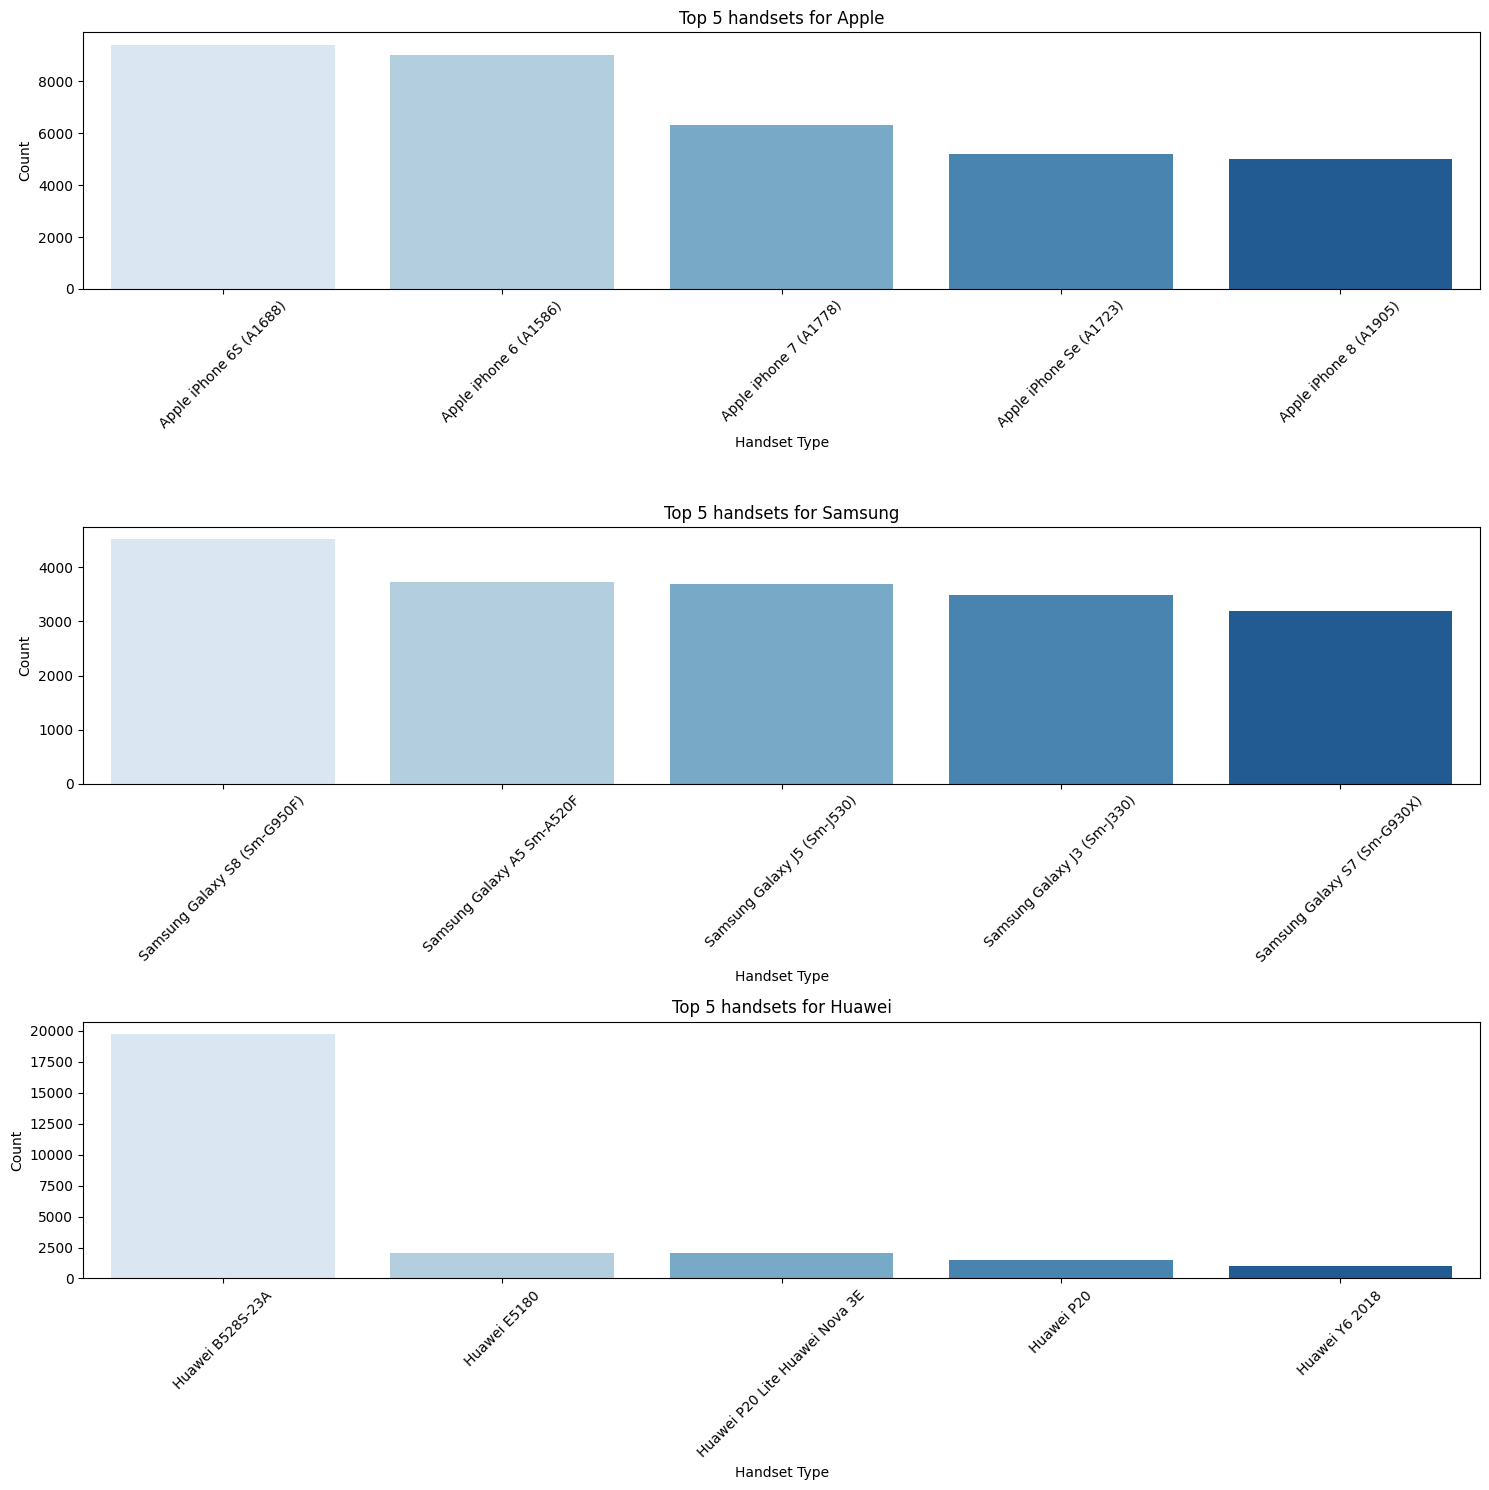

In [16]:
# Visualizing the top 5 handsets for each manufacturer using seaborn
plt.figure(figsize=(15, 15))

for i, (manufacturer, top_handsets) in enumerate(top_handsets_per_manufacturer.items()):
    plt.subplot(3, 1, i+1)
    sns.barplot(x=top_handsets.index, y=top_handsets.values, palette='Blues')
    plt.title(f'Top 5 handsets for {manufacturer}')
    plt.xlabel('Handset Type')
    plt.ylabel('Count')
    plt.xticks(rotation=45)
    plt.tight_layout()

plt.show()

Interpretation:

The overwhelming preference for Apple devices, particularly the iPhone 6S and iPhone 6, indicates a strong market share for Apple within your customer base.
This dominance could potentially shape the direction of your network offerings and services to cater better to iPhone users.
Recommendations to the Telecom Marketing Team:

Tailored Data Plans: Offer data plans that are optimized for iPhone users, perhaps with features like seamless iCloud backup or exclusive app streaming services.
Device Upgrade Programs: Leverage the popularity of the iPhone 6S and iPhone 6 to launch targeted device upgrade programs. These can entice customers to switch to newer iPhone models or even consider other Apple products.
Exclusive Apple Bundles: Partner with Apple to offer exclusive bundles that combine your telecom services with Apple's ecosystem. This could include special deals on Apple Music, iCloud storage, or even AppleCare services.
Network Performance Assurance: Ensure that your network offers the best performance and reliability for Apple devices. This can be a unique selling point to attract and retain iPhone users.
Customer Support & Training: Given the popularity of Apple devices, offer specialized customer support and training services tailored to iPhone users. This can include workshops on optimizing network settings, troubleshooting common issues, and getting the most out of their devices.
Competitive Analysis: Keep an eye on emerging handset trends and competitor offerings. While Apple is currently dominant, the landscape can change rapidly with the introduction of new devices or technologies. Stay agile and be prepared to adapt your strategies accordingly.
Feedback and Engagement: Engage with your iPhone user community through surveys, feedback sessions, and focus groups. Understand their needs, preferences, and pain points to continuously refine your offerings and deliver exceptional customer experiences.

In [17]:
# number of users 
number_of_users = df['MSISDN/Number'].nunique()
# telecom[ 'MSISDN/Number'].isna().sum()
print (f"number of users = {number_of_users}")

number of users = 106856


In [18]:
#number of sessions
df['Bearer Id'].nunique()

134708

In [19]:
# the total download (DL) and upload (UL) data
total_dl = df['Total DL (Bytes)'].sum()
total_ul = df[ 'Total UL (Bytes)'].sum()
print (total_dl,"and", total_ul)

68196514511845.0 and 6168180943816.0


In [20]:
# Aggregate per user
user_aggregated = df.groupby('MSISDN/Number').agg({
    'Bearer Id': 'count',               # Number of xDR sessions
    'Dur. (ms)': 'sum',      # Total session duration
    'Total DL (Bytes)': 'sum',          # Total download data
    'Total UL (Bytes)': 'sum'           # Total upload data
})
user_aggregated.columns = ['Number of xDR sessions', 'Total Session Duration (s)',
                           'Total Download (Bytes)', 'Total Upload (Bytes)']

user_aggregated


,Number of xDR sessions,Total Session Duration (s),Total Download (Bytes),Total Upload (Bytes)
MSISDN/Number,,,,
3.360100e+10,1,116720.0,8.426375e+08,36053108.0
3.360100e+10,1,181230.0,1.207552e+08,36104459.0
3.360100e+10,1,134969.0,5.566597e+08,39306820.0
3.360101e+10,1,49878.0,4.019932e+08,20327526.0
3.360101e+10,2,37104.0,1.363130e+09,94280527.0
...,...,...,...,...
3.379000e+10,1,8810.0,6.879252e+08,26716429.0
3.379000e+10,1,140988.0,4.445751e+08,35732243.0
3.197021e+12,1,877385.0,1.948281e+08,37295915.0


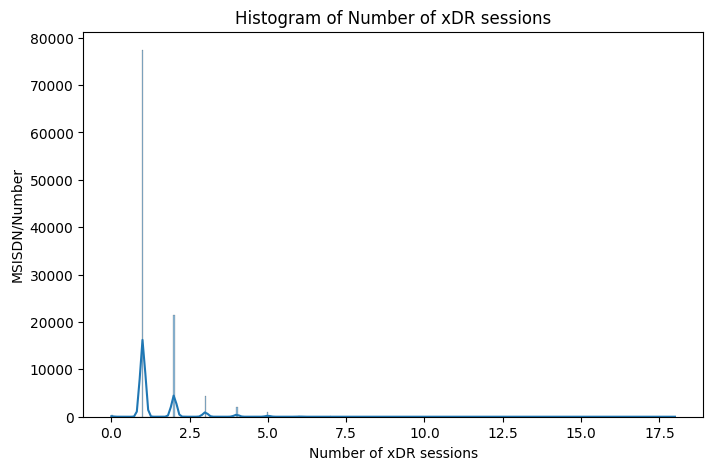

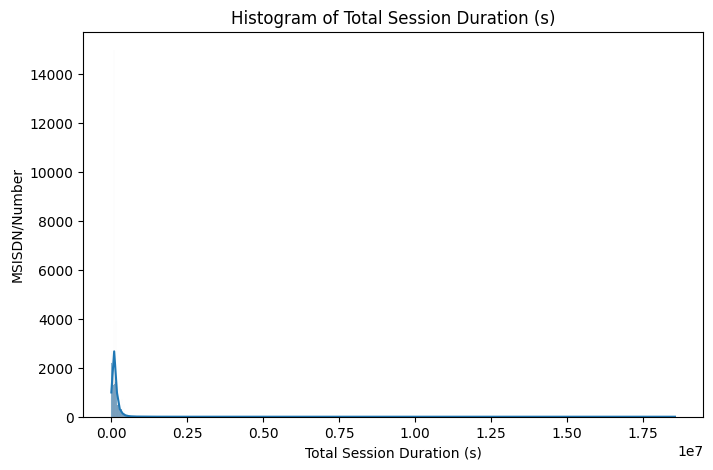

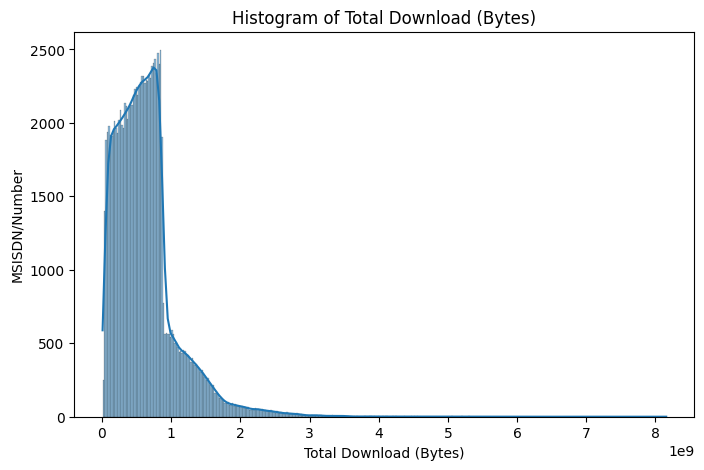

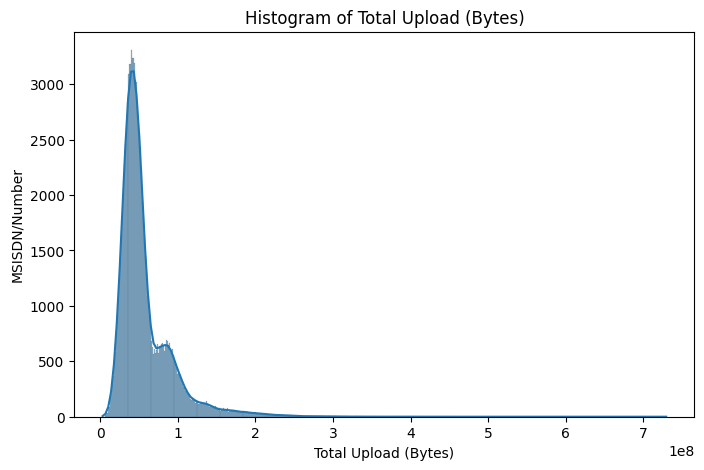

In [21]:
# Plot histograms for selected variables
selected_variables = ['Number of xDR sessions', 'Total Session Duration (s)',
                           'Total Download (Bytes)', 'Total Upload (Bytes)']

for variable in selected_variables:
    plt.figure(figsize=(8, 5))
    sns.histplot(user_aggregated[variable], kde=True)
    plt.title(f'Histogram of {variable}')
    plt.ylabel('MSISDN/Number')
    plt.show()


In [33]:
# treat all missing values and outliers in the dataset by replacing by the mean of the corresponding column.
# first let us check the disrbution and identify outliers

 # Separate categorical and numerical columns
categorical_cols = df.select_dtypes(include='object').columns


from utils import preproccess_numerical_data
preproccess_numerical_data(df)

numerical_cols = df.select_dtypes(include=['number']).columns



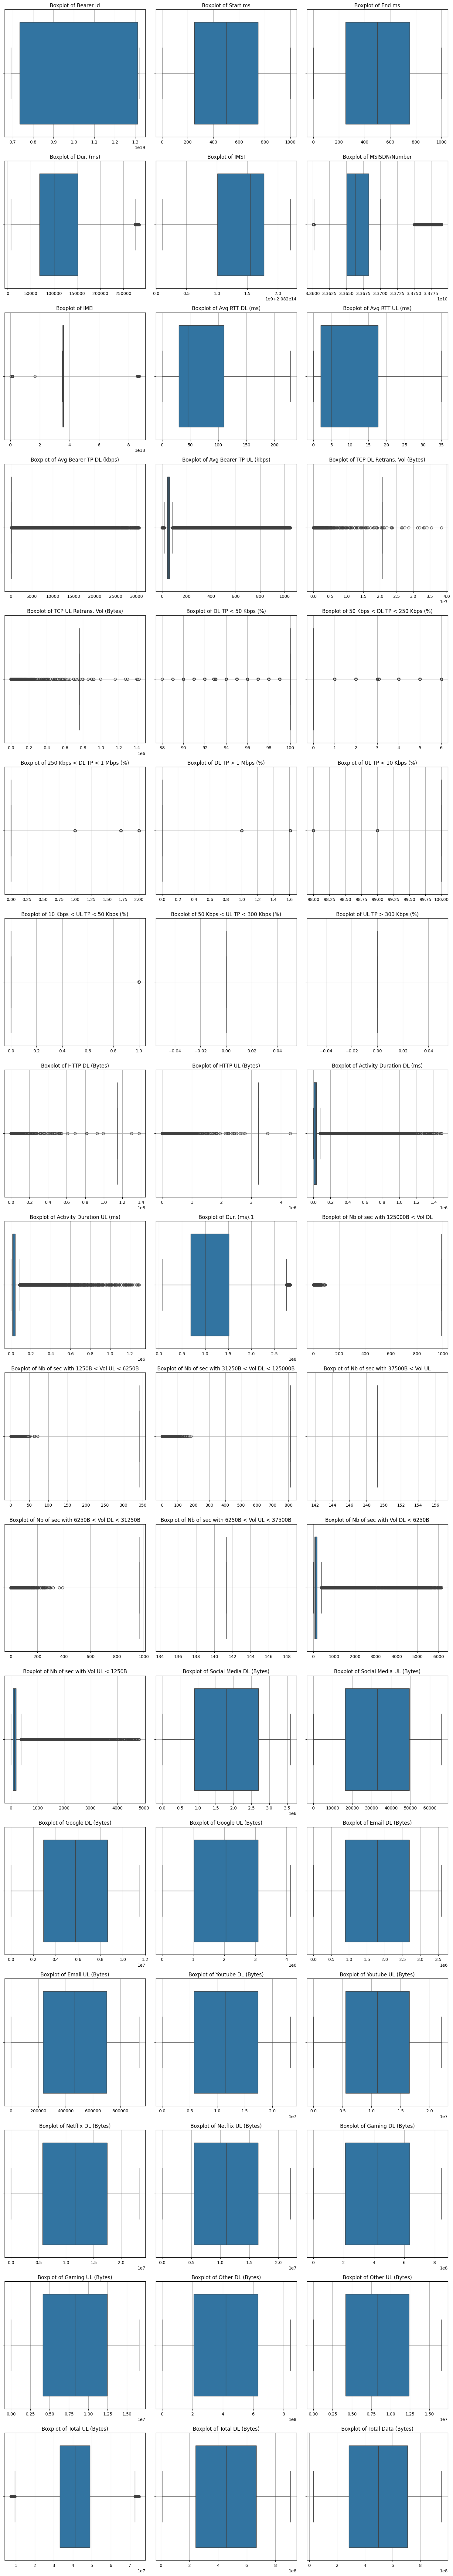

In [49]:
import matplotlib.pyplot as plt
import seaborn as sns
numerical_cols = df.select_dtypes(include=['number']).columns

# Calculate the number of rows and columns for the grid layout
num_plots = len(numerical_cols)
num_cols = 3  # Number of columns in the grid
num_rows = -(-num_plots // num_cols)  # Ceiling division to calculate the number of rows

# Set up the matplotlib figure with a grid layout
fig, axes = plt.subplots(nrows=num_rows, ncols=num_cols, figsize=(15, 5*num_rows))

# Flatten the axes array for easy iteration
axes = axes.flatten()

# Create boxplots for each numerical column
for i, col in enumerate(numerical_cols):
    sns.boxplot(x=df[col], ax=axes[i])
    axes[i].set_title(f'Boxplot of {col}')
    axes[i].set_xlabel('')
    axes[i].set_ylabel('')
    axes[i].grid(True)

# Remove any unused axes
for j in range(num_plots, num_rows*num_cols):
    fig.delaxes(axes[j])

# Adjust layout
plt.tight_layout()

# Display the plot
plt.show()

In [36]:
#handle outliers using Z_score
from scipy import stats
import numpy as np

z_scores = stats.zscore(df[numerical_cols])
abs_z_scores = np.abs(z_scores)
filtered_entries = (abs_z_scores < 3).all(axis=1)
df = df[filtered_entries]
print(df[filtered_entries])


           Bearer Id            Start  Start ms              End  End ms  \
75      7.349883e+18  4/21/2019 19:02     601.0   4/25/2019 0:30   766.0   
79      1.311448e+19  4/21/2019 21:53     450.0   4/25/2019 2:38   201.0   
80      1.311448e+19  4/21/2019 21:53     407.0   4/25/2019 0:01   444.0   
81      7.349883e+18   4/22/2019 0:14       5.0   4/25/2019 4:52     2.0   
87      7.349883e+18   4/22/2019 2:44     778.0   4/25/2019 2:34   835.0   
...              ...              ...       ...              ...     ...   
149994  1.311448e+19   4/29/2019 7:28      83.0  4/30/2019 15:01   268.0   
149996  7.277826e+18   4/29/2019 7:28     451.0   4/30/2019 6:02   214.0   
149997  7.349883e+18   4/29/2019 7:28     483.0  4/30/2019 10:41   187.0   
149998  1.311448e+19   4/29/2019 7:28     283.0  4/30/2019 10:46   810.0   
149999  1.311448e+19   4/29/2019 7:28     696.0  4/30/2019 10:40   327.0   

        Dur. (ms)          IMSI  MSISDN/Number          IMEI  \
75       278864.0  2.08

C:\Users\Ourba\AppData\Local\Temp\ipykernel_20188\3100942974.py:9: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  print(df[filtered_entries])


In [37]:
import numpy as np



numerical_cols = df.select_dtypes(include=['number']).columns

# Calculate basic metrics for each numerical column
basic_metrics = df[numerical_cols].agg(['mean', 'median', 'std', 'min', 'max', 
                                        lambda x: x.quantile(0.25), lambda x: x.quantile(0.75)])

# Rename lambda functions to IQR
basic_metrics.rename(index={'<lambda_0>': 'Q1', '<lambda_1>': 'Q3'}, inplace=True)

# Display the basic metrics
print(basic_metrics)


             Bearer Id    Start ms      End ms      Dur. (ms)          IMSI  \
mean      1.002021e+19  499.510758  498.219924  110955.429276  2.082014e+14   
median    7.349883e+18  499.000000  499.000000  101231.500000  2.082015e+14   
std       2.879478e+18  288.171902  287.572093   59383.000053  4.714868e+08   
min       6.917538e+18    0.000000    0.000000    7142.000000  2.082001e+14   
max       1.318654e+19  999.000000  999.000000  283627.000000  2.082022e+14   
<lambda>  7.349883e+18  251.000000  252.000000   68776.500000  2.082010e+14   
<lambda>  1.311448e+19  748.000000  750.000000  151466.500000  2.082018e+14   

          MSISDN/Number          IMEI  Avg RTT DL (ms)  Avg RTT UL (ms)  \
mean       3.367282e+10  4.164521e+13        62.285126         8.351047   
median     3.366331e+10  3.565551e+13        46.000000         5.000000   
std        4.573448e+07  1.679470e+13        38.324786         7.340776   
min        3.360100e+10  4.400152e+11         0.000000         0.00

Overall, analyzing basic metrics in a dataset is a foundational step in data analysis and plays a critical role in achieving the global objective by ensuring data quality, facilitating informed decision-making, and supporting various analytical and modeling tasks.




In [43]:


numerical_cols = df.select_dtypes(include=['number']).columns

# Compute dispersion parameters for each quantitative variable
selected_cols = [
    'Dur. (ms)', 'Avg RTT DL (ms)', 'Avg RTT UL (ms)', 
    'Avg Bearer TP DL (kbps)', 'Avg Bearer TP UL (kbps)', 
    'Total UL (Bytes)', 'Total DL (Bytes)'
]
dispersion_params = pd.DataFrame({
    'Variance': df[selected_cols].var(),
    'Std Deviation': df[selected_cols].std(),
    'Range': df[selected_cols].max() - df[selected_cols].min(),
    'IQR': df[selected_cols].quantile(0.75) - df[selected_cols].quantile(0.25)
})

# Display the dispersion parameters
print(dispersion_params.head(10))


                             Variance  Std Deviation        Range  \
Dur. (ms)                3.526341e+09   5.938300e+04     276485.0   
Avg RTT DL (ms)          1.468789e+03   3.832479e+01        228.0   
Avg RTT UL (ms)          5.388699e+01   7.340776e+00         35.0   
Avg Bearer TP DL (kbps)  8.811779e+06   2.968464e+03      30599.0   
Avg Bearer TP UL (kbps)  1.809905e+04   1.345327e+02       1046.0   
Total UL (Bytes)         1.263983e+14   1.124270e+07   67424432.0   
Total DL (Bytes)         5.965861e+16   2.442511e+08  893923407.0   

                                  IQR  
Dur. (ms)                8.269000e+04  
Avg RTT DL (ms)          7.979571e+01  
Avg RTT UL (ms)          1.566288e+01  
Avg Bearer TP DL (kbps)  2.900000e+01  
Avg Bearer TP UL (kbps)  1.600000e+01  
Total UL (Bytes)         1.580495e+07  
Total DL (Bytes)         4.230465e+08  


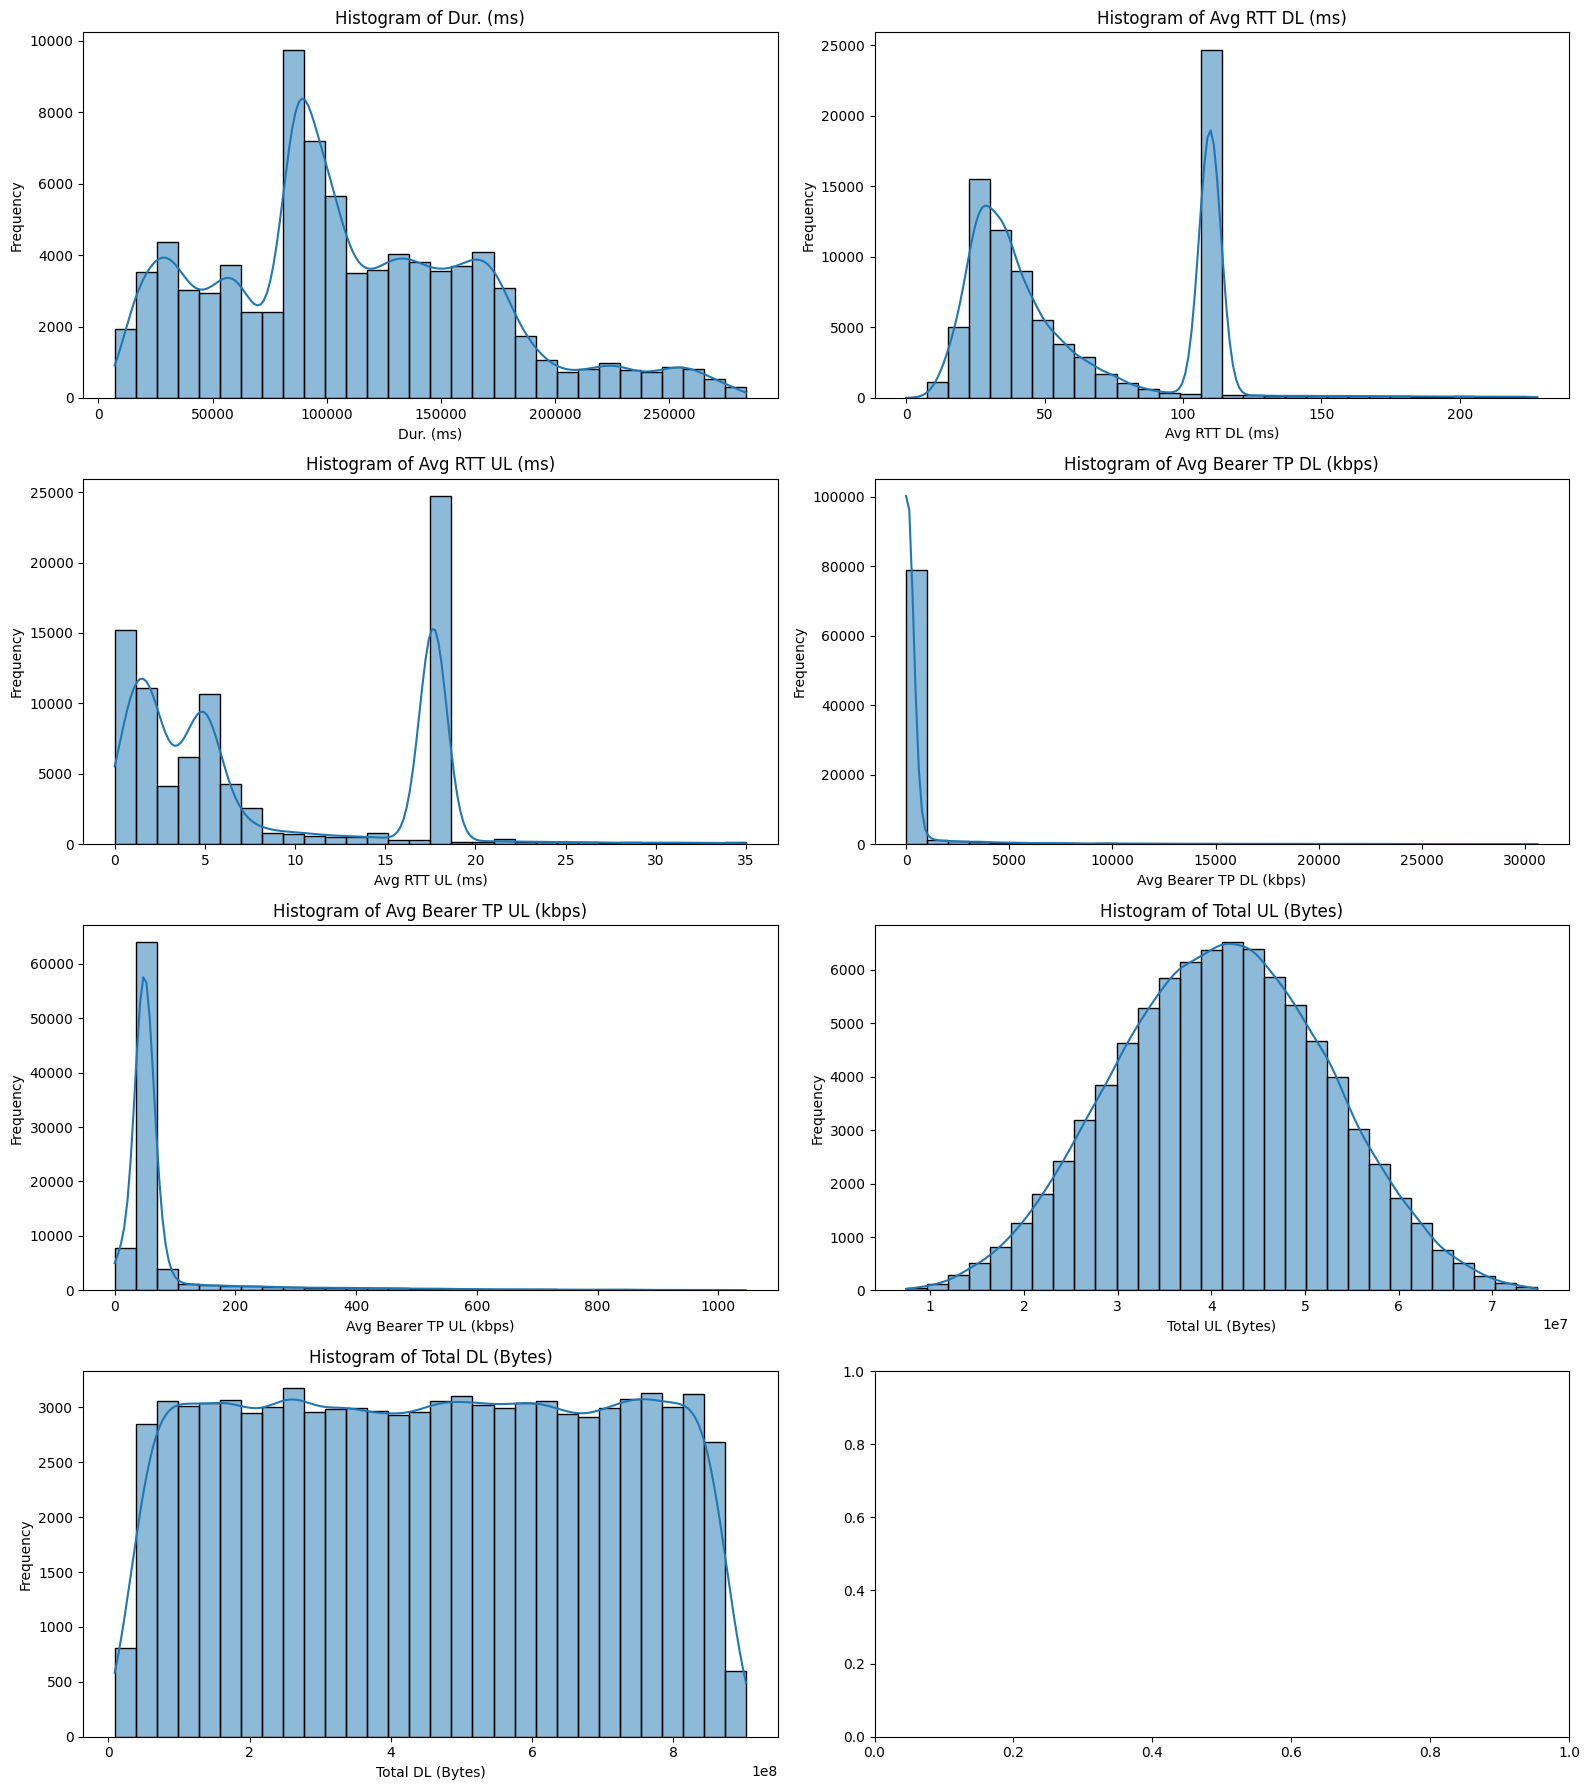

In [44]:
fig, axes = plt.subplots(nrows=4, ncols=2, figsize=(16, 18))

# Flatten the axes array for easy iteration
axes = axes.flatten()

# Plot histograms for each selected column
for i, col in enumerate(selected_cols):
    sns.histplot(df[col], kde=True, ax=axes[i], bins=30)
    axes[i].set_title(f'Histogram of {col}')
    axes[i].set_xlabel(col)
    axes[i].set_ylabel('Frequency')

# Adjust layout to prevent overlap
plt.tight_layout()

# Display the plot
plt.show()

Interpretation of Findings:
Duration (Dur. (ms)):
The histogram shows that the majority of calls have durations clustered around certain values, with fewer calls having extremely short or long durations.
This indicates that most calls have a typical duration, and extreme values may represent outliers or specific scenarios requiring further investigation.
Average Round-Trip Time (Avg RTT DL/UL):
The histograms for both downlink and uplink average round-trip times show a relatively normal distribution.
This suggests that the network latency is generally consistent, with most round-trip times falling within a certain range.
Average Bearer Throughput (Avg Bearer TP DL/UL):
The histograms for both downlink and uplink average bearer throughputs indicate a wide range of throughput values.
This highlights the variability in data transfer rates, with some users experiencing significantly higher or lower throughputs than others.
Total Data Volume (Total UL/DL Bytes):
The histograms for total uplink and downlink data volumes reveal a right-skewed distribution, with a long tail of higher data volume values.
This suggests that while the majority of users consume a moderate amount of data, there are some users who consume a significantly larger volume of data, possibly due to heavy usage or specific data-intensive activities.
Conclusion:
Network Performance:
The average round-trip times for downlink and uplink indicate relatively consistent network latency, but the variability in average bearer throughputs suggests that data transfer rates can vary significantly among users.
Network latency and throughput are critical factors affecting user experience, and consistent monitoring and optimization are essential to maintain satisfactory performance levels.
User Behavior and Data Consumption:
The distribution of call durations and data volumes highlights the variability in user behavior and data consumption patterns.
Understanding these patterns can help identify opportunities for targeted marketing, service offerings, and network optimization to better meet the diverse needs and preferences of users.
Anomalies and Outliers:
The presence of outliers in call durations, round-trip times, and data volumes indicates specific scenarios or issues requiring further investigation and potential intervention to address any underlying issues or optimize network performance.
Overall, the graphical univariate analysis of these important columns provides valuable insights into network performance, user behavior, and data consumption patterns. Continuous monitoring, analysis, and optimization based on these insights are essential to enhance network performance, improve user experience, and drive business growth.

c:\Users\Ourba\Desktop\10Academy\10ac_week1_telecom_analysis\.venv\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


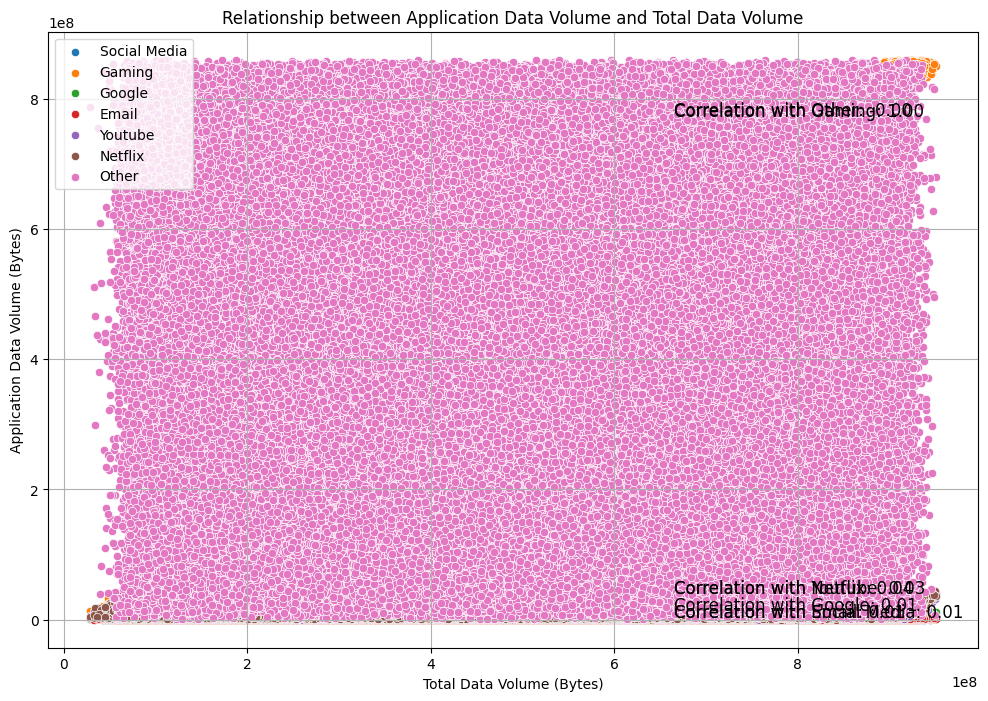

In [45]:



selected_apps = [
    'Social Media', 'Gaming', 'Google', 
    'Email', 'Youtube', 'Netflix', 
    'Other'  # Assuming 'Other' represents other applications' data volume
]

# Calculate total data volume (Total UL + Total DL) in Bytes
df['Total Data (Bytes)'] = df['Total UL (Bytes)'] + df['Total DL (Bytes)']

# Set up the matplotlib figure
plt.figure(figsize=(12, 8))

# Bivariate Analysis: Scatter Plot & Correlation Coefficient
for app in selected_apps:
    # Scatter Plot
    sns.scatterplot(x=df['Total Data (Bytes)'], y=df[f'{app} DL (Bytes)'] + df[f'{app} UL (Bytes)'], label=app)
    
    # Calculate Pearson correlation coefficient
    correlation_coefficient = df['Total Data (Bytes)'].corr(df[f'{app} DL (Bytes)'] + df[f'{app} UL (Bytes)'])
    
    plt.text(df['Total Data (Bytes)'].max() * 0.7, (df[f'{app} DL (Bytes)'] + df[f'{app} UL (Bytes)']).max() * 0.9, 
             f'Correlation with {app}: {correlation_coefficient:.2f}', fontsize=12)

# Plot Settings
plt.title('Relationship between Application Data Volume and Total Data Volume')
plt.xlabel('Total Data Volume (Bytes)')
plt.ylabel('Application Data Volume (Bytes)')
plt.legend()
plt.grid(True)

# Display the plot
plt.show()


In [50]:
df['Total Duration (ms)'] = df['Dur. (ms)'] + df['Dur. (ms).1']  # Assuming 'Dur. (ms)' and 'Dur. (ms).1' are the session durations
total_duration_per_user = df.groupby('MSISDN/Number')['Total Duration (ms)'].sum().reset_index()

# Calculate deciles based on the total duration
total_duration_per_user['Decile'] = pd.qcut(total_duration_per_user['Total Duration (ms)'], 10, labels=False) + 1

# Compute the total data volume (DL+UL) per decile class
total_data_per_decile = df.merge(total_duration_per_user[['MSISDN/Number', 'Decile']], on='MSISDN/Number', how='inner') \
                           .groupby('Decile')[['Total UL (Bytes)', 'Total DL (Bytes)']].sum()

# Display the total data volume (DL+UL) per decile class
print(total_data_per_decile)

        Total UL (Bytes)  Total DL (Bytes)
Decile                                    
1           2.991383e+11      3.265431e+12
2           3.169730e+11      3.530888e+12
3           3.122634e+11      3.448969e+12
4           2.998378e+11      3.307476e+12
5           3.123376e+11      3.458674e+12
6           3.099629e+11      3.435466e+12
7           3.135675e+11      3.496497e+12
8           3.392927e+11      3.768534e+12
9           4.041826e+11      4.482850e+12
10          6.066044e+11      6.682741e+12


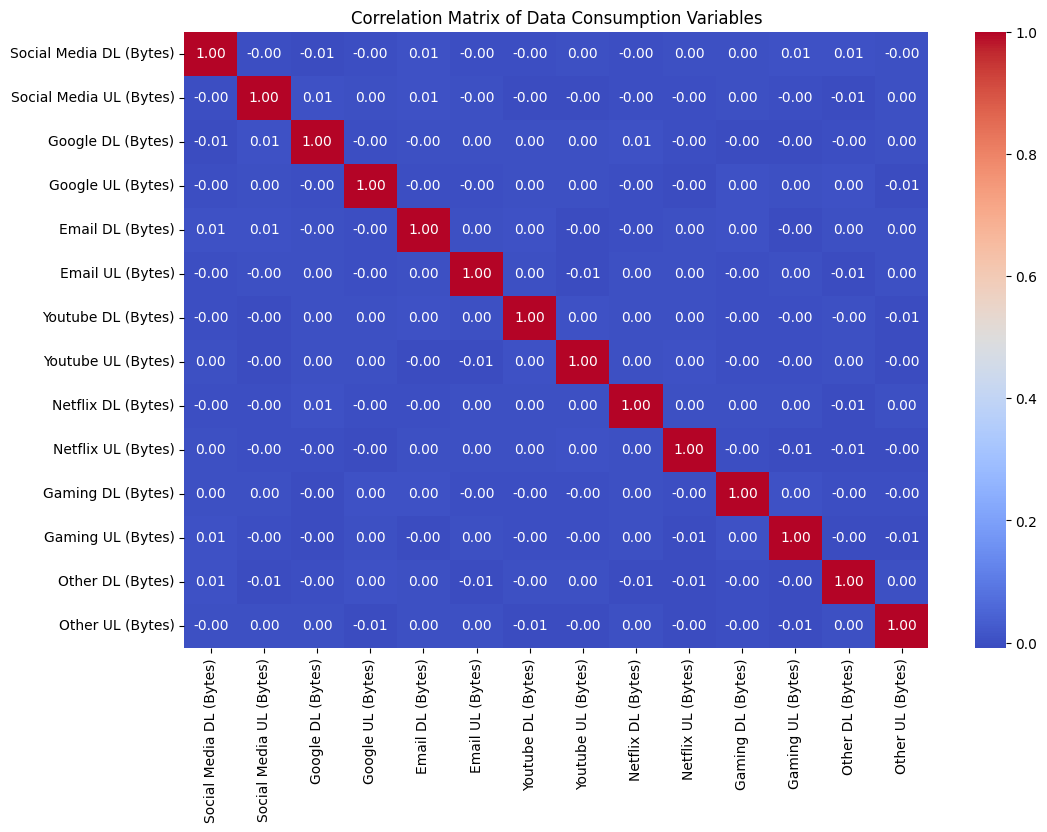

                         Social Media DL (Bytes)  Social Media UL (Bytes)  \
Social Media DL (Bytes)                 1.000000                -0.000562   
Social Media UL (Bytes)                -0.000562                 1.000000   
Google DL (Bytes)                      -0.005273                 0.006670   
Google UL (Bytes)                      -0.002014                 0.001205   
Email DL (Bytes)                        0.005242                 0.006481   
Email UL (Bytes)                       -0.002254                -0.000061   
Youtube DL (Bytes)                     -0.001861                -0.004921   
Youtube UL (Bytes)                      0.003047                -0.004892   
Netflix DL (Bytes)                     -0.003067                -0.001725   
Netflix UL (Bytes)                      0.002707                -0.003989   
Gaming DL (Bytes)                       0.000876                 0.000443   
Gaming UL (Bytes)                       0.007092                -0.001315   

In [52]:
selected_cols = [
    'Social Media DL (Bytes)', 'Social Media UL (Bytes)',
    'Google DL (Bytes)', 'Google UL (Bytes)',
    'Email DL (Bytes)', 'Email UL (Bytes)',
    'Youtube DL (Bytes)', 'Youtube UL (Bytes)',
    'Netflix DL (Bytes)', 'Netflix UL (Bytes)',
    'Gaming DL (Bytes)', 'Gaming UL (Bytes)',
    'Other DL (Bytes)', 'Other UL (Bytes)'
]

# Create a subset DataFrame containing only the selected columns
subset_df = df[selected_cols]

# Compute the correlation matrix
correlation_matrix = subset_df.corr()

# Plot the correlation matrix using a heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", annot_kws={"size": 10})
plt.title('Correlation Matrix of Data Consumption Variables')
plt.show()

# Display the correlation matrix
print(correlation_matrix)

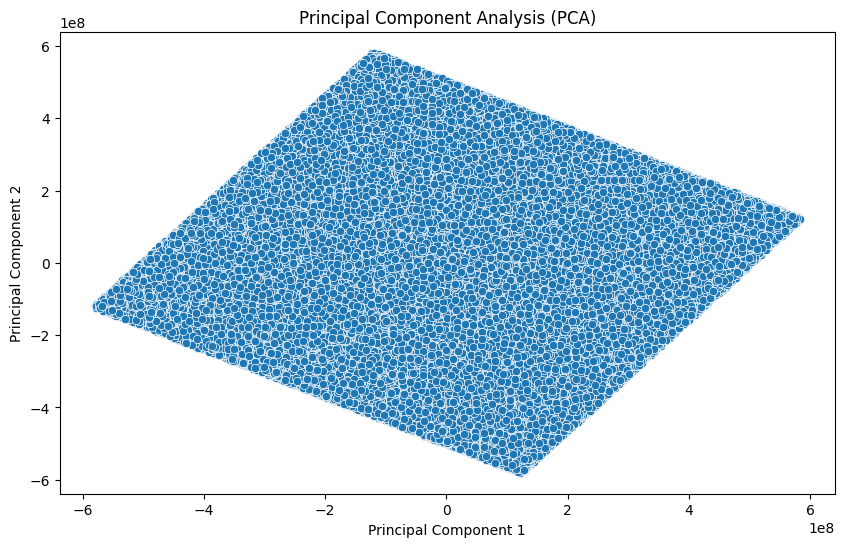

Explained Variance Ratio: [0.50111782 0.49694372]


In [53]:
from sklearn.decomposition import PCA

# Assuming df is your DataFrame containing the specified columns
selected_cols = [
    'Social Media DL (Bytes)', 'Social Media UL (Bytes)',
    'Google DL (Bytes)', 'Google UL (Bytes)',
    'Email DL (Bytes)', 'Email UL (Bytes)',
    'Youtube DL (Bytes)', 'Youtube UL (Bytes)',
    'Netflix DL (Bytes)', 'Netflix UL (Bytes)',
    'Gaming DL (Bytes)', 'Gaming UL (Bytes)',
    'Other DL (Bytes)', 'Other UL (Bytes)'
]

# Create a subset DataFrame containing only the selected columns
subset_df = df[selected_cols]

# Perform PCA
pca = PCA(n_components=2)  # Reduce to 2 principal components for visualization
principal_components = pca.fit_transform(subset_df)

# Create a DataFrame for the principal components
principal_df = pd.DataFrame(data=principal_components, columns=['Principal Component 1', 'Principal Component 2'])

# Plot the principal components
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Principal Component 1', y='Principal Component 2', data=principal_df)
plt.title('Principal Component Analysis (PCA)')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()

# Display the explained variance ratio
print(f"Explained Variance Ratio: {pca.explained_variance_ratio_}")


-High Variance Captured: The first two principal components explain about 99.8% of the total variance, indicating they effectively summarize the data's key patterns.
-Balanced Contribution: Both components contribute roughly equally to the variance, suggesting they're both important for representing the data's structure.
-Dimensionality Reduction Success: PCA successfully reduces the dataset's dimensionality while preserving most of its information, simplifying analysis.
-Interpretability and Insights: The high variance captured enables easier interpretation, helping identify key variables driving data consumption patterns.